**A very trivial Neural network** : the goal is to predict a target value of 1 or 0 depending on three binary inputs. This target value takes 1 whenever the first input is 1 and 0 otherwise

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [8]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

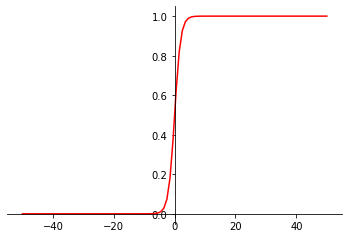

In [9]:
x = np.linspace(-50,50,100)
y = sigmoid(x)
# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('right')

# plot the function
plt.plot(x,y, 'r')

In [45]:
def sigmoid_derivative(x):
  return sigmoid(x)*(1-sigmoid(x))

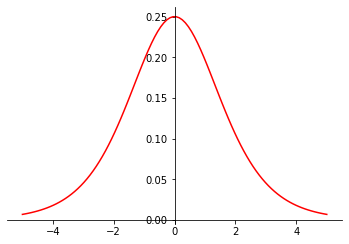

In [46]:
x = np.linspace(-5,5,100)
y = sigmoid_derivative(x)
# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y, 'r')

lets initialize our dataset

In [33]:
training_input = np.array([[0,0,1],[1,1,1],[1,0,1],[0,1,1]])
training_input

array([[0, 0, 1],
       [1, 1, 1],
       [1, 0, 1],
       [0, 1, 1]])

In [48]:
training_output = np.array([[0,1,1,0]]).T
training_output

array([[0],
       [1],
       [1],
       [0]])

In [84]:
import pandas as pd
df1 = pd.DataFrame(training_input)
df1 = df1.rename(columns={0: "input1", 1: "input2",2: "input3"})
df2 = pd.DataFrame(training_output)
df2 = df2.rename(columns={0: "target"})
data = pd.concat([df1,df2],axis=1)
data


,input1,input2,input3,target
0,0,0,1,0
1,1,1,1,1
2,1,0,1,1
3,0,1,1,0


In [11]:
np.random.seed(1)

initialize weights

In [30]:
weights = 2*np.random.random((3,1))-1
weights

array([[ 0.15677923],
       [-0.18372639],
       [-0.52594604]])

Output with initial weigths

In [34]:
sigmoid(np.dot(training_input,weights))

array([[0.37146291],
       [0.36519342],
       [0.40874236],
       [0.32967122]])

Backpropagation TT

In [54]:
alpha = 0.1
for iteration in range(50000):
  input_layer = training_input
  output = sigmoid(np.dot(input_layer,weights))
  error = output - training_output
  weights = weights - alpha* np.dot(input_layer.T,error*sigmoid_derivative(output))

In [55]:
sigmoid(np.dot(training_input,weights))

array([[1.03255283e-03],
       [9.99125302e-01],
       [9.99417697e-01],
       [6.87426091e-04]])

In [56]:
sigmoid(np.dot(np.array([1,0,0]),weights))

array([0.9999994])